In [ ]:
## Setting Up Workspace

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing dataset
url = 'https://raw.githubusercontent.com/damaspandyaj/Digital-Skola-Final-Project/main/marketing-churn.csv'
df = pd.read_csv(url)

# MARKETING CHURN ANALYSIS AND MODELING

## A. Business Understanding dan Problem Statement

isi dengan business understanding

**Problem statement**
=================

isi dengan prbolem statement

## B. Data Understanding

Deskripsikan secara singkat tentang data yang kita punya dan sertakan fields description. Semua koding untuk melihat data secara singkat masukkan di sini. Data mini processing juga bisa dimasukkan di sini.

## C. Exploratory Data Analysis

### 1. Bivariate Analysis

Pada bivariate analysis, semua variable single (kecuali target) di bandingkan terhadap target.

### 2. Multivariate Analysis

Pada saat melakukan bivariate analysis, kalian pasti menemukan ada variable yang sepertinya berhubungan dengan variable lain selain variable target. Nah, cantumkan analysis variable yang lebih dari 2 itu di sini. Tidak harus semua variable di analysis multivariate.

## D. Business Decision and Action

Jika teman teman merasa, ada keputusan bisnis lain selain modeling, masukkan di sini. Jika tidak ada, kosongkan dan hapus.

## E. Modeling

### 1. Data Preprocessing

Di sini dilakukan preprocessing lanjutan dari hasil temuan data pada EDA. Termasuk didalamnya data transformation seperti mengubah data kategorical menjadi numeric, dsb.

### 2. Feature Engineering

Di sini dilakukan feature engineering berdasarkan temuan teman teman ketika melakukan EDA.

### 3. Feature Selection

Ketika melakukan bivariate dan multivariate analysis, teman-teman tentu menemukan mana feature yang berpengaruh dan mana feature yang tidak berpengaruh. Nah feature yang berpengaruh itu dipilih lalu diseleksi lebih lanjut di sini. Bisa menggunakan metode feature importance di sini : https://machinelearningmastery.com/feature-selection-machine-learning-python/

### 4. Dataset Splitting

### 5. Model Fitting

#### Logistic Regression

#### Random Forest

#### SGBoost

### 6. Model Evaluation

### 7. Model Selection 



# **A. Business Understanding dan Problem Statement**

# **B. Data Understanding**

In [ ]:
df.shape

(2240, 28)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Tanpa ID, ada total 26 Variable Independen dan 1 Variabel Target (Response). 

Pembagian kita:

9-pertama: Mbak Luthfi (Year_Birth - MntWines)
9-kedua: Mas Cecep (MntFruits - NumStorePurchases)
9-ketiga: Mas Damas (sisa)
Output teman-teman ke PPT
Business Understanding: Damas 

Cari model algorithm yang mau dipakai setiap orang 1 (beserta alasan)

Melihat dataset di atas terdapat informasi berikut:
* Kita memiliki record data **2240** dan **28** kolom
* Terdapat **5** variabel bertipe data **object** atau **variabel kategorical**
* Sisa variabel berjumlah **23** variabel disebut **variabel numerikal**
* Nama kolom 'Income' terdapat **spasi** dan jumlah data yang ditunjukkan **2216** saja


In [ ]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Checking & Handling Null Values**

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Seperti yang dapat kita lihat, kolom 'Income' memiliki nilai null dan untuk mengatasinya kita dapat menghapus baris yang berisi nilai null. Mengapa?

* Jumlah nilai yang hilang dalam baris kurang dari 5%
* Jika kita melakukan drop kolom 'Income' keseluruhan maka akan mempengaruhi feature analysis 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

**Handling space issue in Income column name**

In [ ]:
df.rename(columns={' Income ':'Income'}, inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')



*   Setelah diperbaiki, kolom "Income" sudah tidak memiliki spasi lagi



**Checking & Handling Duplicate Data**

In [ ]:
df_duplicated=df[df.duplicated()]
print("you have {} duplicate rows".format(len(df_duplicated)))

you have 0 duplicate rows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

**Transform an Income column to numeric format**

In [ ]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

<ipython-input-53-686ecc658b14>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


*  Kolom "Income" koma dan $ (sebagai Object), sementar untuk pemrosesan selanjutnya kita hanya membutuhkan nilai bulat dengan bentuk data Float

**Transform Dt_Customer column to datetime format**

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%m/%d/%y') 

#**C. Exploratory Data Analysis**

## **1. Bivariate Analysis**

### **Crosstable Education to Response**

In [ ]:
# Create a crosstab table
crosstab = pd.crosstab(df['Education'], df['Response'])

# Add a new column "Proportion" to the crosstab table
crosstab['Proportion'] =  df["Education"] / education_counts * 100
crosstab['Proportion'] = crosstab['Proportion'].mul(100)


# Print the crosstab table
print(crosstab)


Response      0    1 Proportion
Education                      
2n Cycle    178   22        NaN
Basic        52    2        NaN
Graduation  964  152        NaN
Master      309   56        NaN
PhD         380  101        NaN


In [ ]:
# Create the crosstable
crosstab = pd.crosstab(df['Education'], df['Response'], normalize='index')
crosstab = crosstab.round(decimals=2) # Round to 2 decimal points
crosstab["Proportion"] =  crosstab.apply(lambda row: row[1] / (row[0] + row[1]), axis=1)
# Print the crosstable
print(crosstab)

Response       0     1  Proportion
Education                         
2n Cycle    0.89  0.11        0.11
Basic       0.96  0.04        0.04
Graduation  0.86  0.14        0.14
Master      0.85  0.15        0.15
PhD         0.79  0.21        0.21


In [ ]:
education_counts = df['Education'].value_counts()
print(education_counts)

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


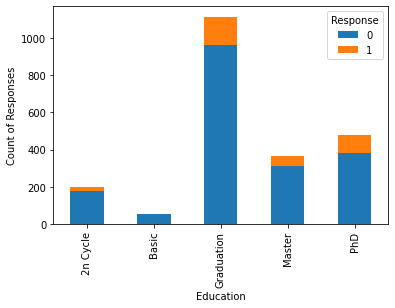

In [ ]:
df_grouped = df.groupby(['Education','Response']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Count of Responses')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

education = df['Education']
response = df['Response']

contingency_table = pd.crosstab(education, response)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic: ", chi2)
print("p-value: ", p)

Chi-square test statistic:  23.150710092597464
p-value:  0.00011814284716953253


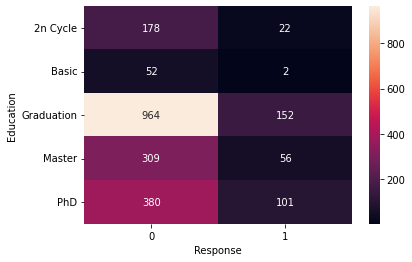

In [ ]:
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.xlabel('Response')
plt.ylabel('Education')
plt.show()

Key Takeaway: Tabel kontingensi atau contingency table adalah tabel yang menunjukkan distribusi frekuensi dari dua variabel kategori. Uji chi-square adalah uji statistik yang menentukan apakah ada hubungan yang signifikan antara dua variabel kategori.

Dan dari yang dihasilkan, nilai p yang rendah menunjukkan bahwa ada hubungan yang signifikan secara statistik antara dua variabel kategori "Education" dan "Response". Hal ini menunjukkan bahwa tingkat pendidikan mungkin memiliki dampak pada respone.

### **Crosstable Marital Status to Response**

In [ ]:
# replace certain levels of Marital_Status with 'Other'
df["Marital_Status"] = df["Marital_Status"].apply(lambda x: "Other" if x in ["Absurd","Alone","YOLO"] else x)

In [ ]:
print(df['Marital_Status'].unique())
print(df['Response'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Other']
[1 0]


In [ ]:
from scipy.stats import chi2_contingency

Marital_Status = df['Marital_Status']
response = df['Response']

ct= pd.crosstab(Marital_Status, response)

chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square test statistic: ", chi2)
print("p-value: ", p)

Chi-square test statistic:  53.13381081115089
p-value:  3.157164544859771e-10


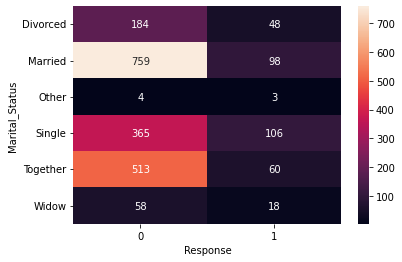

In [ ]:
sns.heatmap(ct, annot=True, fmt='d')
plt.xlabel('Response')
plt.ylabel('Marital_Status')
plt.show()

Key Takeaway:

Hasil uji statistik memang p-value tidak menunjukkan hubungan signifikan antara status pernikahan dengan variabel target, tetapi secara umum campaign Response cenderung diterima mereka yang tidak atau sudah tidak berpasangan. Selanjutnya, bisa dipersempit untuk kategori marital status ini dengan membagi kategori berpasangan dan tidak berpasangan

### **Income to Response**

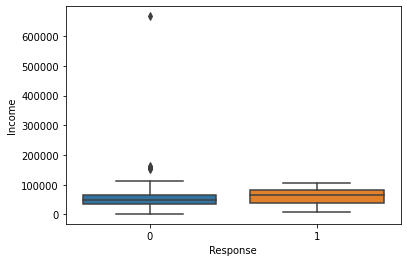

In [ ]:
#Box Plot
sns.boxplot(x=df['Response'], y=df['Income'])
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

Key Takeaway: 

Dari Boxplot terlihat tidak ada perbedaan signifikan antara jumlah pendapatan dengan respon pada kampanye yang dapat dilihat dari garis tengah atau garis median 

### **Kidhome to Response**

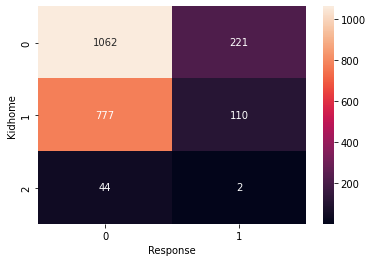

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Kidhome'], df['Response'])

# Create a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')

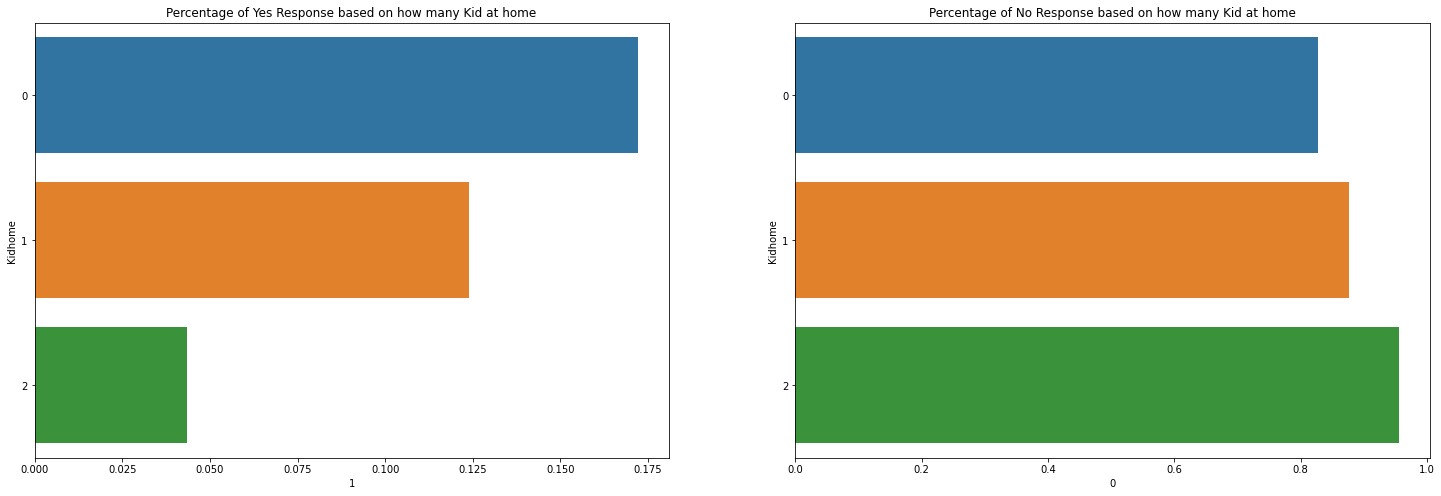

In [ ]:
response_rate_kidhome = pd.crosstab(df["Kidhome"], df["Response"]).apply(lambda r: r/r.sum(), axis = 1)

fig, axs = plt.subplots(1,2, figsize= (25,8))
sns.barplot(data = response_rate_kidhome, x = response_rate_kidhome[1], y = response_rate_kidhome.index, orient = 'h', ax =axs [0])
axs[0].set_title("Percentage of Yes Response based on how many Kid at home")

sns.barplot(data=response_rate_kidhome, x=response_rate_kidhome[0], y=response_rate_kidhome.index, orient='h', ax=axs[1])
axs[1].set_title("Percentage of No Response based on how many Kid at home")

plt.show()

Key Takeaway: 

In [ ]:
Kidhome = df['Kidhome']

cont_table= pd.crosstab(Kidhome, response)

chi2, p, dof, expected = chi2_contingency(cont_table)
print("Chi-square test statistic: ", chi2)
print("p-value: ", p)

Chi-square test statistic:  13.752835089373244
p-value:  0.001031833930751051


Key Takeaway: Nilai p dalam uji chi-squared ini kurang dari 0,05 (0,00066), yang menunjukkan hubungan yang signifikan secara statistik antara kedua variabel yang diuji. Nilai p yang rendah menunjukkan bahwa hubungan antara variabel tidak mungkin muncul secara kebetulan, dan ini memberikan bukti kuat bahwa ada hubungan nyata antara variabel dalam populasi. 

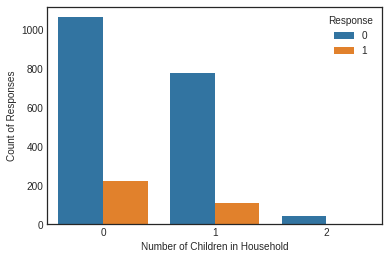

In [ ]:
# Group the data by the "Kidhome" and "Response" variables
grouped = df.groupby(['Kidhome', 'Response'])['Response'].count().reset_index(name='Count')

# Plot the bar plot
sns.barplot(x='Kidhome', y='Count', hue='Response', data=grouped)

# Add labels to the x and y axes
plt.xlabel('Number of Children in Household')
plt.ylabel('Count of Responses')



# Show the plot
plt.show()

Key Takeaway: Dari bar chart, customer tanpa anak kecil pada rumahnya lebih banyak menanggapi campaign dan mayoritas memilih menolak campaign dan semakin banyak anak kecil pada rumah semakin sedikit jumlah customer yang menanggapi campaign.

### Teenhome to Response

In [ ]:
Teenhome = df['Teenhome']

cont_table_teen= pd.crosstab(Teenhome, response)

chi2, p, dof, expected = chi2_contingency(cont_table_teen)
print("Chi-square test statistic: ", chi2)
print("p-value: ", p)

Chi-square test statistic:  57.34500680762981
p-value:  3.5293114847486525e-13


Key Takeaway: Nilai p sebesar 2.147696703661783e-13 menunjukkan bahwa kemungkinan yang sangat rendah bahwa hubungan antara kedua variabel “Teenhome” dan “Response” adalah karena kebetulan. Semakin kecil nilai p, semakin kuat bukti terhadap hipotesis nol dan semakin kuat kesimpulan bahwa ada hubungan antar variabel.

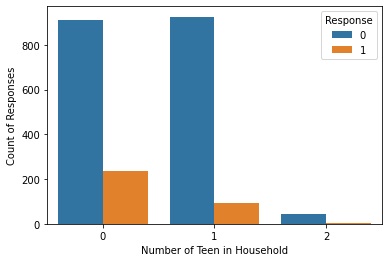

In [ ]:
# Group the data by the "Teenhome" and "Response" variables
grouped_teen = df.groupby(['Teenhome', 'Response'])['Response'].count().reset_index(name='Count')

# Plot the bar plot
sns.barplot(x='Teenhome', y='Count', hue='Response', data=grouped_teen)

# Add labels to the x and y axes
plt.xlabel('Number of Teen in Household')
plt.ylabel('Count of Responses')

# Show the plot
plt.show()

### **Dt_Customer to Response**

In [ ]:
# Create a new column with the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['month'] = df['Dt_Customer'].dt.month
df['season'] = df['month'].apply(get_season)

# Group the data by season and calculate the mean of the response variable for each season
seasonal_mean = df.groupby('season')['Response'].mean()

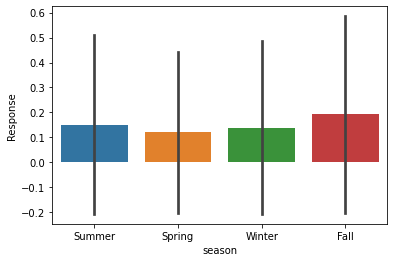

In [ ]:
#Bar plot
sns.barplot(x='season', y='Response', data=df,  ci='sd')

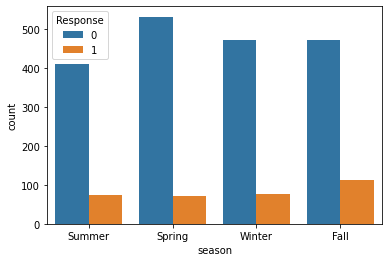

In [ ]:
sns.countplot(data=df, x='season', hue='Response')
plt.show()

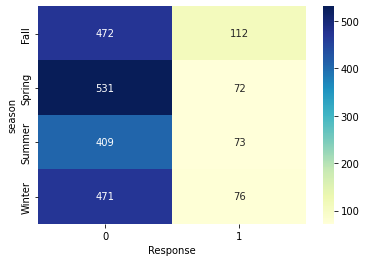

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['Response'])

# Create a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

Key Takeaway: Dapat dilihat jika Dt_Customer di groupby menjadi musim dengan nama variable "season", dapat disimpulkan bahwa pada musim gugur atau Fall jumlah customer yang menerima campaign dari pada musim-musim lainya. Dan pada group musim semi atau Spring terlihat bahwa jumlah customer yang menolak campaign dengan jumlah tertinggi 

### **Dt_Customer to Response groupby month**

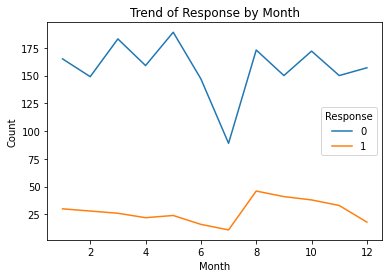

In [ ]:
df['month'] = df['Dt_Customer'].dt.month
df_month = df.groupby(['month'])['Response'].value_counts()
df_month = df_month.unstack()
df_month.plot(kind = 'line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trend of Response by Month')
plt.show()

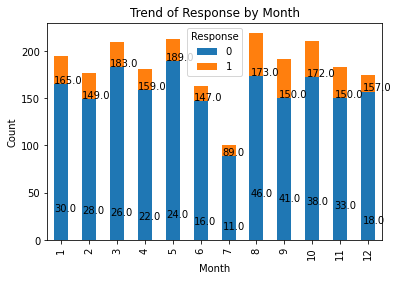

In [ ]:
#Bar Chart
ax = df_month.plot(kind = 'bar', stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trend of Response by Month')
plt.show()

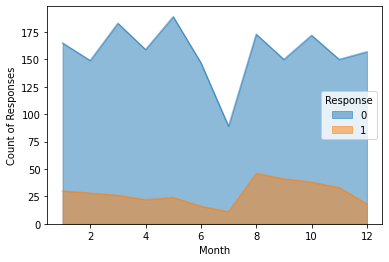

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Dt_Customer']).month
df_grouped = df.groupby(['Month','Response']).size().unstack()
df_grouped.plot(kind='area', stacked=False)
plt.xlabel('Month')
plt.ylabel('Count of Responses')
plt.show()

### **Recency to Response**

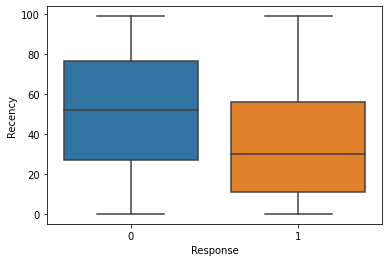

In [ ]:
#Boxplot
sns.boxplot(x='Response', y='Recency', data=df)
plt.show()

Key Takeaway: Dengan nilai dari garis tengah atau yang terlihat berbeda dapat disimpulkan adanya pengaruh dari Recency terhadap hasil campaign yang diterima customers dengan jumlah customers yang menolak lebih banyak dari pada menerima campaign. Semakin lama recency atau hari terakhir pembelian(purchase) semakin banyak customer yang menolak campaign.

### **MnTWines to Response**

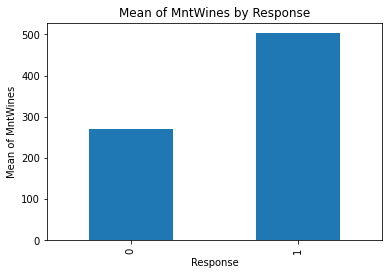

In [ ]:
# Group the data by 'Response'
grouped = df.groupby("Response")

# Create a bar plot
grouped["MntWines"].mean().plot(kind="bar")

# Add labels and title
plt.xlabel("Response")
plt.ylabel("Mean of MntWines")
plt.title("Mean of MntWines by Response")
plt.show()

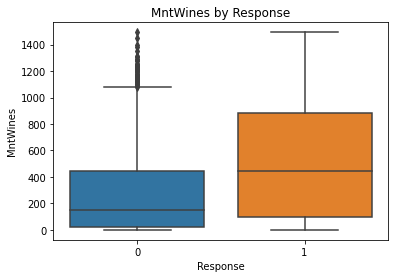

In [ ]:
# Create a box plot
sns.boxplot(x='Response', y='MntWines', data=df)
plt.xlabel("Response")
plt.ylabel("MntWines")
plt.title("MntWines by Response")
plt.show()

In [ ]:
Corr = df[["Education", "Income", "Kidhome", "Teenhome", "MntWines", "Dt_Customer","Recency","Marital_Status","Response"]].corr()
Corr

,Income,Kidhome,Teenhome,MntWines,Recency,Response
Income,1.000000,-0.428669,0.019133,0.578650,-0.003970,0.133047
Kidhome,-0.428669,1.000000,-0.039869,-0.497336,0.011492,-0.077909
Teenhome,0.019133,-0.039869,1.000000,0.003747,0.013838,-0.153901
MntWines,0.578650,-0.497336,0.003747,1.000000,0.015721,0.246299
Recency,-0.003970,0.011492,0.013838,0.015721,1.000000,-0.199766
Response,0.133047,-0.077909,-0.153901,0.246299,-0.199766,1.000000


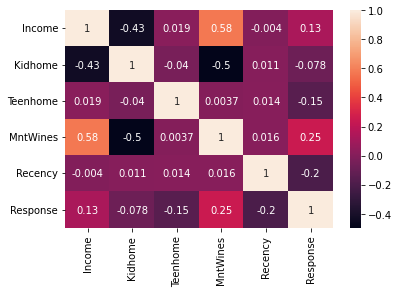

In [ ]:
sns.heatmap(Corr, annot=True)
plt.show()

### **Group Bivariate Analysis**

MntFruits,
MntMeatProducts,
MntFishProducts,
MntSweetProducts,
MntGoldProds,
NumDealsPurchases,
NumWebPurchases,
NumCatalogPurchases,
NumStorePurchases



---



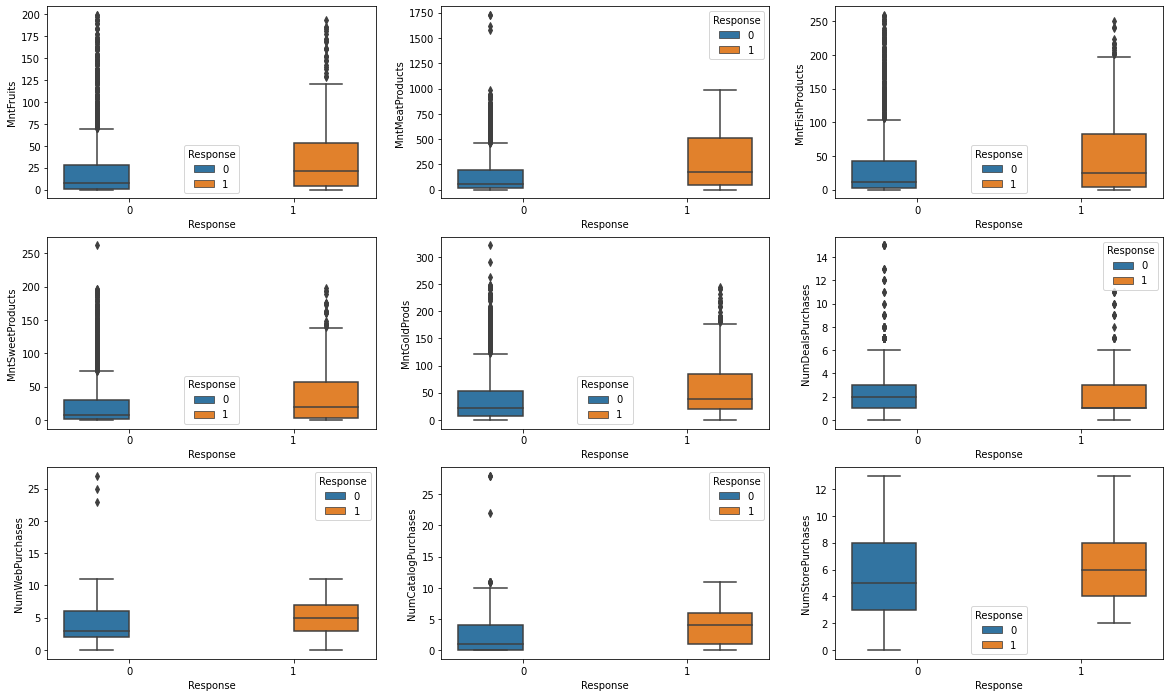

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 3, figsize=(20, 12))
sns.boxplot(y='MntFruits',x = 'Response', hue = 'Response',data = df, ax=axarr[0][0])
sns.boxplot(y='MntMeatProducts',x = 'Response', hue = 'Response',data = df , ax=axarr[0][1])
sns.boxplot(y='MntFishProducts',x = 'Response', hue = 'Response',data = df, ax=axarr[0][2])
sns.boxplot(y='MntSweetProducts',x = 'Response', hue = 'Response',data = df, ax=axarr[1][0])
sns.boxplot(y='MntGoldProds',x = 'Response', hue = 'Response',data = df, ax=axarr[1][1])
sns.boxplot(y='NumDealsPurchases',x = 'Response', hue = 'Response',data = df, ax=axarr[1][2])
sns.boxplot(y='NumWebPurchases',x = 'Response', hue = 'Response',data = df, ax=axarr[2][0])
sns.boxplot(y='NumCatalogPurchases',x = 'Response', hue = 'Response',data = df, ax=axarr[2][1])
sns.boxplot(y='NumStorePurchases',x = 'Response', hue = 'Response',data = df, ax=axarr[2][2])

In [ ]:
corr_matrix = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response']].corr()
corr_matrix

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
MntFruits,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,0.122443
MntMeatProducts,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,0.237746
MntFishProducts,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,0.108145
MntSweetProducts,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,0.116170
MntGoldProds,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,0.140332
NumDealsPurchases,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.003451
NumWebPurchases,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,0.151431
NumCatalogPurchases,0.486263,0.734127,0.532757,0.495136,0.442428,-0.012118,0.386868,1.000000,0.517840,0.219914
NumStorePurchases,0.458491,0.486006,0.457745,0.455225,0.389180,0.066107,0.516240,0.517840,1.000000,0.036241
Response,0.122443,0.237746,0.108145,0.116170,0.140332,0.003451,0.151431,0.219914,0.036241,1.000000


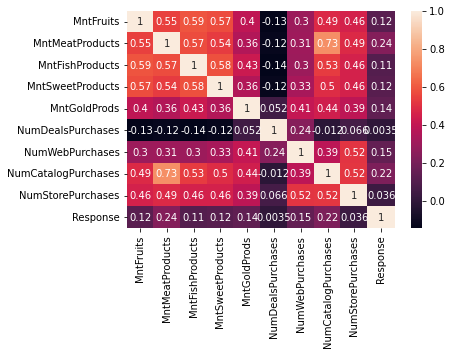

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

all these 9 variables has not significant effect on the accept or not the Campaign.
but if we can see there is a little different for variables MntMeatProducts & NumCatalogPurchases with Response

Text(0.5, 1.0, 'NumStorePurchases ')

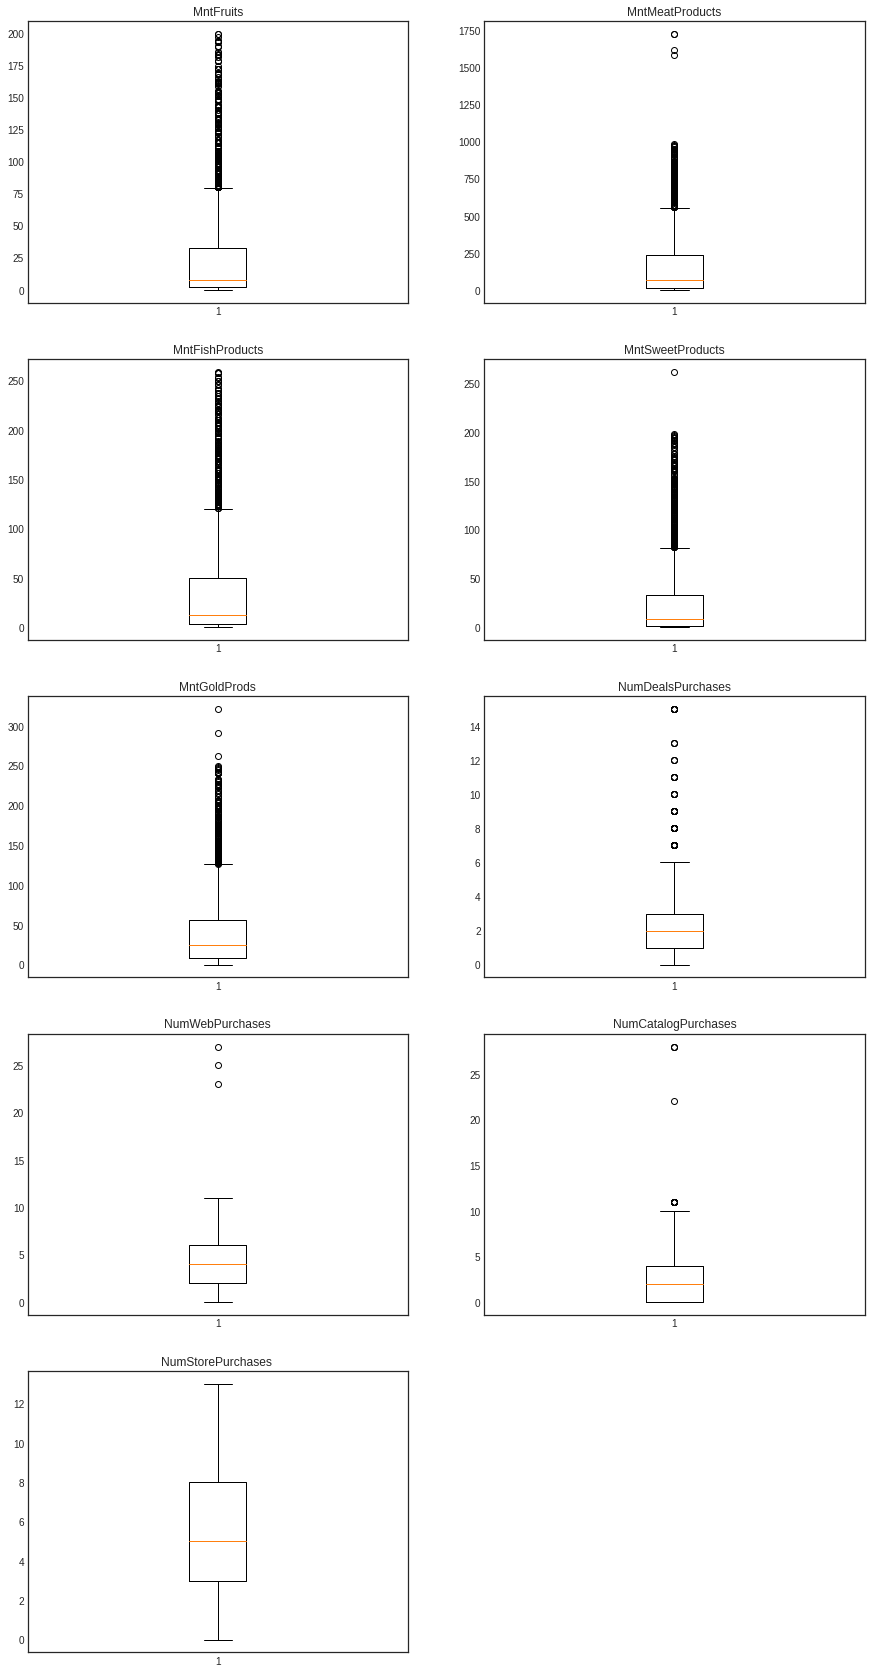

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['MntFruits'])
ax.set_title('MntFruits')
plt.style.use('seaborn-white')
ax=plt.subplot(522)
plt.boxplot(df['MntMeatProducts'])
ax.set_title('MntMeatProducts')
ax=plt.subplot(523)
plt.boxplot(df['MntFishProducts'])
ax.set_title('MntFishProducts')
ax=plt.subplot(524)
plt.boxplot(df['MntSweetProducts'])
ax.set_title('MntSweetProducts')
ax=plt.subplot(525)
plt.boxplot(df['MntGoldProds'])
ax.set_title('MntGoldProds')
ax=plt.subplot(526)
plt.boxplot(df['NumDealsPurchases'])
ax.set_title('NumDealsPurchases')
ax=plt.subplot(527)
plt.boxplot(df['NumWebPurchases'])
ax.set_title('NumWebPurchases')
ax=plt.subplot(528)
plt.boxplot(df['NumCatalogPurchases'])
ax.set_title('NumCatalogPurchases')
ax=plt.subplot(529)
plt.boxplot(df['NumStorePurchases'])
ax.set_title('NumStorePurchases ')



---



MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0


In [ ]:
damas_vars = df.loc[:,'NumWebVisitsMonth':'Country']
damas_vars.head()

,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,0,0,0,0,0,1,0,SP
1,5,0,0,0,0,1,1,0,CA
2,2,0,0,0,0,0,0,0,US
3,7,0,0,0,0,0,0,0,AUS
4,7,1,0,0,0,0,1,0,SP


### **Number Web Visits Month to Response**

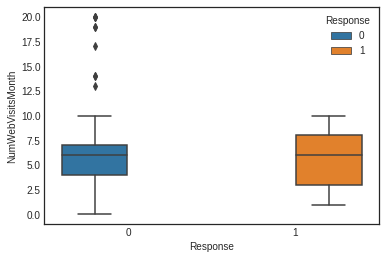

In [ ]:
sns.boxplot(y='NumWebVisitsMonth',x = 'Response', hue = 'Response',data=damas_vars)
plt.show()

Key Takeaway:

Tidak ada perbedaan signifikan antara jumlah pengunjung web (NumWebVisitsMonth) dengan menerima atau menolaknya kampanye oleh customer (Response). Hal ini bisa dilihat dari, median customer yang menolak dan menerima menunjukkan tidak ada perbedaan.

### **Complain to Response**

          Response
Complain          
0             2195
1               21


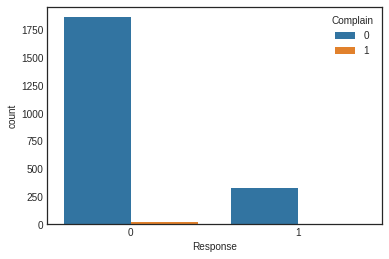

In [ ]:
print(damas_vars.groupby(['Complain']).agg({'Response':'count'}))
sns.countplot(data=damas_vars, x='Response', hue='Complain')
plt.show()

Key Takeaway:

Fitur 'Complain' tidak menunjukkan informasi yang berarti karena kurang dari 1% customer yang melakukan komplain terhadap campaign.

### **Country to Response**

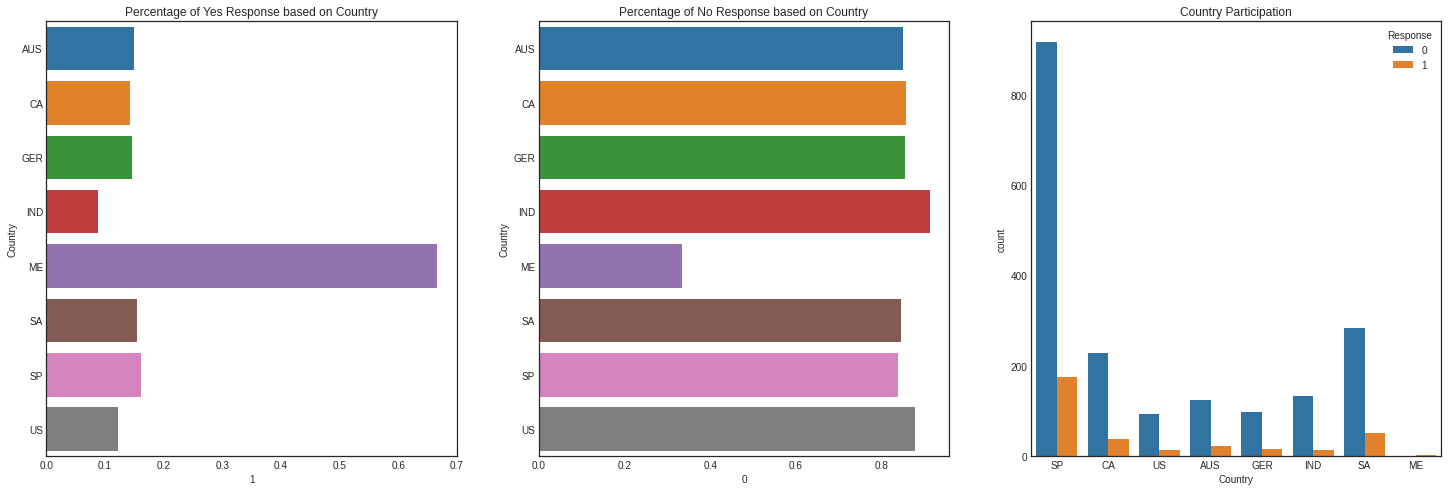

In [ ]:
response_rate = pd.crosstab(df['Country'], df['Response']).apply(lambda r: r/r.sum(), axis=1)

fig, axs = plt.subplots(1, 3, figsize=(25, 8))

sns.barplot(data=response_rate, x=response_rate[1], y=response_rate.index, orient='h', ax=axs[0])
axs[0].set_title("Percentage of Yes Response based on Country")

sns.barplot(data=response_rate, x=response_rate[0], y=response_rate.index, orient='h', ax=axs[1])
axs[1].set_title("Percentage of No Response based on Country")

ax = sns.countplot(data=damas_vars, x='Country', hue='Response')
axs[2].set_title("Country Participation")
plt.show()

Key Takeaway:

* Secara umum, tingkat kesuksesan campaign di negara-negara tidak menunjukkan hubungan signifikan yang berarti, walaupun customer dari ME paling tinggi hanya saja angka partisipasinya sangat kecil dibandingkan negara lain.

* Dari partisipasi negara customer, SP dan SA menjadi negara dengan partisipasi yang dominan bahkan kedua negara tersebut memberikan respon pada campaign terakhir yang tinggi. 

### **Campaigns to Response**

In [ ]:
damas_vars.groupby(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
              'AcceptedCmp5']).agg({'Response':['count','sum']})

Response     
                                                                    count  sum
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5              
0            0            0            0            0                1757  146
                                                    1                  58   20
                                       1            0                  83   11
                                                    1                  24   12
                          1            0            0                 129   55
                                                    1                   6    2
             1            0            0            0                   1    1
                                       1            0                   8    3
                                                    1                   4    2
                          1            0            0                   2    0
                                                    1                   2    2
1            0            0            0            0                  52   13
                                                    1                  21   14
                                       1            0                  12    6
                                                    1                  23   19
                          1            0            0                   8    5
                                                    1                  13   10
             1            0            1            0                   2    2
                                                    1                   8    7
                          1            0            1                   3    3

Key Takeaway:

* Tabel diatas menjelaskan bahwa 146 dari 1777 customer yang tidak pernah menerima tawaran dari kampanye sebelumnya, menerima tawaran dalam kampanye terakhir. Selain itu, kita juga memiliki customer yang menerima beberapa tawaran (Cmp1 dan Cmp5, Cmp1 dan Cmp4, Cmp1 dan Cmp3, Cmp1 dan Cmp2 dan Cmp4, Cmp1 dan Cmp3 dan Cmp5) dan beberapa dari mereka tidak menerima tawaran terakhir.

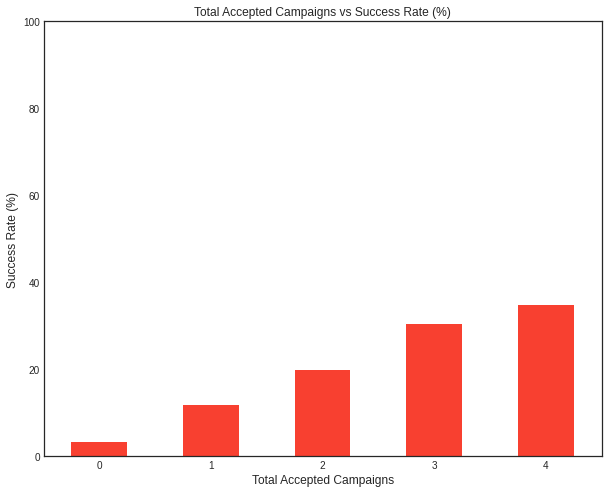

In [ ]:
damas_vars['Total_Acc_Cmp'] = damas_vars['AcceptedCmp1'] + damas_vars['AcceptedCmp2'] + damas_vars['AcceptedCmp3'] + damas_vars['AcceptedCmp4'] + damas_vars['AcceptedCmp5']

result = ((damas_vars.groupby(['Total_Acc_Cmp'])['Response'].mean())/((damas_vars.groupby(['Total_Acc_Cmp'])['Response'].mean()).sum())*100).round(2)

ax = result.plot(kind='bar',figsize=(10,8), color = '#F84030')
plt.xticks(rotation=0);
plt.ylabel('Success Rate (%)',fontsize=12)
plt.title(f'Total Accepted Campaigns vs Success Rate (%)',fontsize=12)
plt.xlabel('Total Accepted Campaigns',fontsize=12)
plt.ylim(0,100)
plt.show()

* Lalu, ketika masing-masing campaigns yang berjumlah 5 tersebut dibandingkan dengan variabel target kita, yaitu 'Response', hasil yang didapat adalah semakin lama customer menerima campaigns akan memberikan tingkat sukses tinggi.

Text(0.5, 1.0, 'Response')

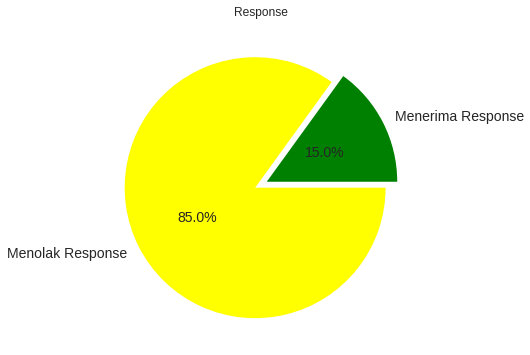

In [ ]:
# Visualisasi hasil dari Response terhadap Campaign
df_vis = df.copy()
df_vis['Response'] = df_vis['Response'].replace([0, 1], ['Menolak Response', 'Menerima Response'])
dfresponse = df_vis.groupby(['Response'])['ID'].nunique()

pie, ax = plt.subplots(figsize = [10,6])
labels = dfresponse.keys()
plt.pie(x = dfresponse, autopct = "%.1f%%", explode = [0.05]*2, colors = (['green', 'yellow']), labels = labels, pctdistance = 0.5, textprops = {'fontsize': 14})
plt.title('Response')

Key Takeaway:

* Dari 2216 pelanggan, hanya 15% yang menerima Response Campaign

#**2. Multivariate Analysis**

In [ ]:
df_multi = df.copy()

## Fitur Products - Response

In [ ]:
# Visualisasi Products dan hubungannya dengan Response
df_products = df_multi[['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_products = df_products.rename(columns = {'MntWines': 'Wine', 'MntFruits': 'Fruit',
                                   'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish',
                                   'MntSweetProducts': 'Sweet', 'MntGoldProds': 'Gold'})
df_products = df_products.melt('ID', var_name = 'Products', value_name = 'Transactions')

df2 = df_multi.merge(df_products, on = 'ID')
df2 = df2[['ID', 'Products', 'Transactions', 'Response']]

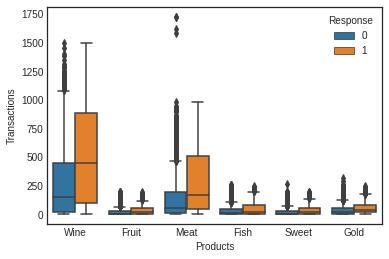

In [ ]:
sns.boxplot(x="Products", y="Transactions", hue="Response", data=df2)

Key Takeaway:

Campaign terakhir, yang diwakili fitur Response, memberikan pengaruh untuk customer dalam membeli Wine dan Meat. Sementara, produk lainnya cenderung tidak berpengaruh dengan adanya campaign ini.

## Fitur Income & Education - Response

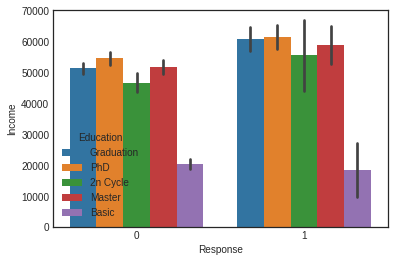

In [ ]:
# Visualisasi Income & Education dan hubungannya dengan Response

sns.barplot(data=df_multi, x='Response', y='Income', hue='Education')

Key Takeaway:

Barplot menunjukkan respon menerima campaign terakhir berasal dari Graduation & PhD, dimana keduanya, merupakan pendidikan tinggi tingkat lanjut pascasarjana. Seiringan juga bahwa dua kelompok ini memiliki pendapatan yang tidak berbeda jauh, yaitu mendekati 60,000.

## Fitur Income & Country - Response

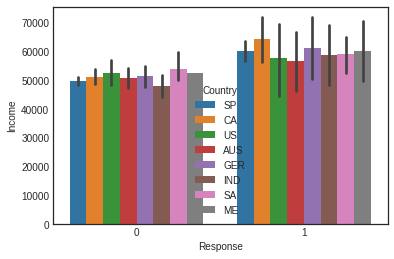

In [ ]:
sns.barplot(data=df_multi, x='Response', y='Income', hue='Country')

Key Takeaway:

Visualisasi memperlihatkan kepenerimaan campaign terakhir cenderung diterima oleh negara Canada yang berpenghasilan di atas 60,000. Sementara, negara-negara lain menunjukkan hubungan yang tidak terlalu signifikan dengan fitur Response

## Fitur Income & Marital Status - Response

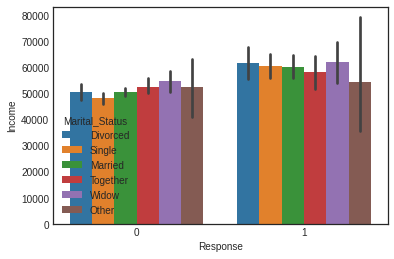

In [ ]:
sns.barplot(data=df_multi, x='Response', y='Income', hue='Marital_Status')

Key Takeaway:

Hasil visualisasi tidak menunjukkan hubungan signifikan antar variabel target dengan Income dan Marital Status, dimana barchat kelompok marital status tidak berbeda jauh. 

## Fitur All Campaigns - Response

In [ ]:
import plotly.graph_objs as go

damas_vars['Total_Acc_Cmp'] = damas_vars['AcceptedCmp1'] + damas_vars['AcceptedCmp2'] + damas_vars['AcceptedCmp3'] + damas_vars['AcceptedCmp4'] + damas_vars['AcceptedCmp5']
result = ((damas_vars.groupby(['Total_Acc_Cmp'])['Response'].mean())/((damas_vars.groupby(['Total_Acc_Cmp'])['Response'].mean()).sum())*100).round(2)

# Visualisasi Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = result.index,
      color = "blue"
    ),
    link = dict(
      source = [i for i in range(len(result))],
      target = [i+1 for i in range(len(result))],
      value = result.values
    )
)])

fig.update_layout(title_text="Total Accepted Campaigns vs Success Rate (%)", font=dict(size=12))
fig.show()


Key Takeaway:

Semua campaign yang telah dilakukan terutama campaign 0 hingga campaign 4, kepenerimaan (dari fitur Response) menunjukkan kesuksesan yang terus meningkat secara bertahap. Bisa dilihat ketika awal campaign, kesuksesan Response hanya berada di angka 3,18% saja, lalu di campaign terakhir, angka ini meningkat menjadi 34,8%. 

## Fitur Numerical - Response

In [ ]:
nums = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth', 'Response']

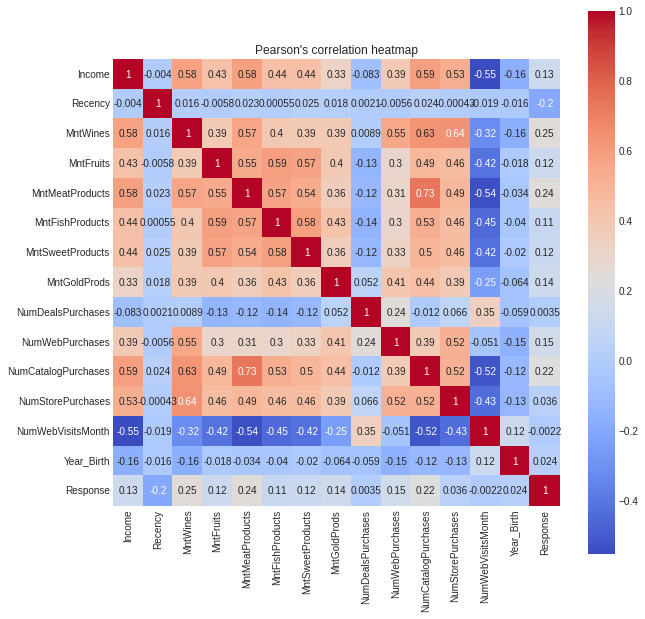

In [ ]:
corr_matr = df_multi[nums].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', square=True)
plt.title("Pearson's correlation heatmap")
plt.show()

# D. Business Decision & Action


# E. Modeling


## **Feature Engineering**

In [ ]:
df_fe = df.copy()

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

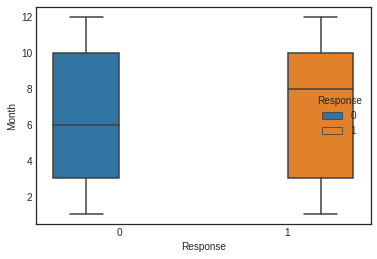

In [ ]:
# Formulasi Dt_Customer menjadi bulan
df_fe['Month'] = df_fe['Dt_Customer'].dt.month
# Visualisasi Total Amounts
sns.boxplot(y='Month',x = 'Response', hue = 'Response',data = df_fe)

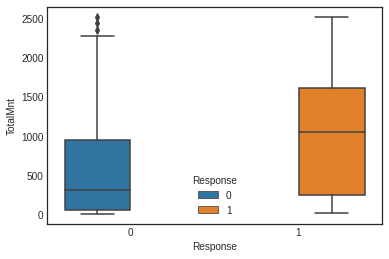

In [ ]:
# Formulasi Total Amounts dari seluruh pengeluaran produk 
df_fe["TotalMnt"] = df_fe["MntWines"] + df_fe["MntFruits"] + df_fe["MntMeatProducts"] + df_fe["MntFishProducts"] + df_fe["MntSweetProducts"] + df_fe["MntGoldProds"]

# Visualisasi Total Amounts
sns.boxplot(y='TotalMnt',x = 'Response', hue = 'Response',data = df_fe)

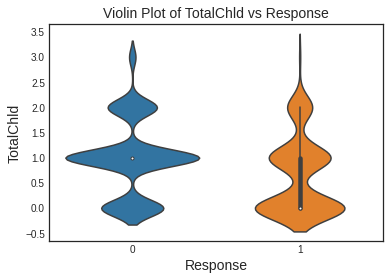

In [ ]:
# Formulasi menjadi Total Children dari Kidhome dan Teenhome
df_fe["TotalChld"] = df_fe["Kidhome"] + df_fe["Teenhome"]

# Visualisasi Total Children
sns.violinplot(y="TotalChld", x ="Response", data = df_fe)
plt.title("Violin Plot of TotalChld vs Response", fontsize=14)
plt.xlabel("Response", fontsize=14)
plt.ylabel("TotalChld", fontsize=14)
plt.show()

In [ ]:
# Menyederhanakan kelompok Marital Status hanya dengan tiga kategori saja
df_fe['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Other         7
Name: Marital_Status, dtype: int64

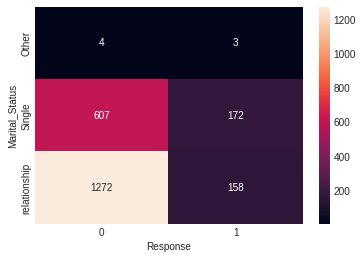

In [ ]:
# Formulasi kelompok kategori
df_fe['Marital_Status'] = df_fe['Marital_Status'].replace(['Married', 'Together'],'relationship')
df_fe['Marital_Status'] = df_fe['Marital_Status'].replace(['Divorced', 'Widow', 'Alone'],'Single')
df_fe['Marital_Status'] = df_fe['Marital_Status'].replace(['YOLO', 'Absurd'], 'Others')

# Visualisasi Marital Status
ct_fe = pd.crosstab(df_fe['Marital_Status'], df_fe['Response'])
sns.heatmap(ct_fe, annot=True, fmt='d')
plt.xlabel('Response')
plt.ylabel('Marital_Status')
plt.show()

Key Takeaway:

Heatmap yang memperlihatkan kecenderungan response terhadap status pernikahan dapat dikatakan bahwa customer yang hidup tanpa pasangan atau sendiri cenderung menerima campaign terakhir dibandingkan mereka yang menjalin hubungan

In [ ]:
# Menyederhanakan kelompok Education hanya dengan tiga kategori saja
df_fe['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

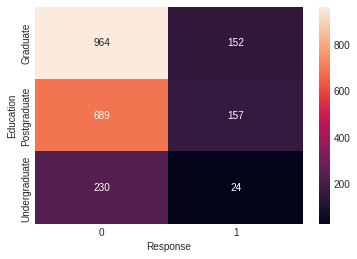

In [ ]:
df_fe["Education"]=df_fe["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                                     "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
# Visualisasi Education
ct_fed = pd.crosstab(df_fe['Education'], df_fe['Response'])
sns.heatmap(ct_fed, annot=True, fmt='d')
plt.xlabel('Response')
plt.ylabel('Education')
plt.show()

## **Encoding**

In [ ]:
df_fe.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,month,season,Month,TotalMnt,TotalChld
0,1826,1970,Graduate,Single,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,6,Summer,6,1190,0
1,1,1961,Graduate,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,6,Summer,6,577,0
2,10476,1958,Graduate,relationship,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,5,Spring,5,251,1
3,1386,1967,Graduate,relationship,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,5,Spring,5,11,2
4,5371,1989,Graduate,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,4,Spring,4,91,1


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

* Melihat tipe data keseluruhan fitur, kita bisa melakukan drop Dt_Customer karena tidak relevan dengan model selanjutnya

* Selain itu kolom ID juga tidak menunjukan relevansi terhadap model nanti, sehingga perlu drop kolom



In [ ]:
df_fe = df_fe.drop(columns=['ID','Dt_Customer'])

In [ ]:
df_fe

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,month,season,Month,TotalMnt,TotalChld
0,1970,Graduate,Single,84835.0,0,0,0,189,104,379,...,0,0,1,0,SP,6,Summer,6,1190,0
1,1961,Graduate,Single,57091.0,0,0,0,464,5,64,...,0,1,1,0,CA,6,Summer,6,577,0
2,1958,Graduate,relationship,67267.0,0,1,0,134,11,59,...,0,0,0,0,US,5,Spring,5,251,1
3,1967,Graduate,relationship,32474.0,1,1,0,10,0,1,...,0,0,0,0,AUS,5,Spring,5,11,2
4,1989,Graduate,Single,21474.0,1,0,0,6,16,24,...,0,0,1,0,SP,4,Spring,4,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,Postgraduate,Single,66476.0,0,1,99,372,18,126,...,0,0,0,0,US,3,Spring,3,689,1
2236,1977,Undergraduate,relationship,31056.0,1,0,99,5,10,13,...,0,0,0,0,SP,1,Winter,1,55,1
2237,1976,Graduate,Single,46310.0,1,0,99,185,2,88,...,0,0,0,0,SP,12,Winter,12,309,1
2238,1978,Graduate,relationship,65819.0,0,0,99,267,38,701,...,0,0,0,0,IND,11,Fall,11,1383,0


Dari seluruh kolom yang ada, kita bisa melihat terdapat bentuk data kategorikal objek seperti, "Education", "Marital_Status", dan "Country".
Untuk itu, perlu dilakukan encoding. Khusus untuk "Education" akan menggunakan LabelEncode karena termasuk dalam data ordinal bertingkat sesuai dengan level pendidikan.

In [ ]:
# Label Encoding untuk membuat level pendidikan seperti ini
df_fe['Education'] = df_fe['Education'].map({'Undergraduate': 0, 'Graduate': 1, 'Postgraduate': 2})

In [ ]:
#One Hot Encoding terhadap data nominal di dua kolom ini
onehot = ['Marital_Status', 'Country']
for cat in onehot:
    onehots = pd.get_dummies(df_fe[cat], prefix = cat)
    df_fe = df_fe.join(onehots)

In [ ]:
df_fe.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Single,Marital_Status_relationship,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1970,1,Single,84835.0,0,0,0,189,104,379,...,1,0,0,0,0,0,0,0,1,0
1,1961,1,Single,57091.0,0,0,0,464,5,64,...,1,0,0,1,0,0,0,0,0,0
2,1958,1,relationship,67267.0,0,1,0,134,11,59,...,0,1,0,0,0,0,0,0,0,1
3,1967,1,relationship,32474.0,1,1,0,10,0,1,...,0,1,1,0,0,0,0,0,0,0
4,1989,1,Single,21474.0,1,0,0,6,16,24,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_fe.isna().sum()

Year_Birth                     0
Education                      0
Marital_Status                 0
Income                         0
Kidhome                        0
Teenhome                       0
Recency                        0
MntWines                       0
MntFruits                      0
MntMeatProducts                0
MntFishProducts                0
MntSweetProducts               0
MntGoldProds                   0
NumDealsPurchases              0
NumWebPurchases                0
NumCatalogPurchases            0
NumStorePurchases              0
NumWebVisitsMonth              0
AcceptedCmp3                   0
AcceptedCmp4                   0
AcceptedCmp5                   0
AcceptedCmp1                   0
AcceptedCmp2                   0
Response                       0
Complain                       0
Country                        0
month                          0
season                         0
Month                          0
TotalMnt                       0
TotalChld 

In [ ]:
# Drop kolom setelah proses Feature Engineering
df_fe = df_fe.drop(columns=onehot)
df_fe = df_fe.drop(columns=['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
                            'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'season'])

In [ ]:
# Hasil Encoding
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year_Birth                   2216 non-null   int64  
 1   Education                    2216 non-null   int64  
 2   Income                       2216 non-null   float64
 3   Recency                      2216 non-null   int64  
 4   NumDealsPurchases            2216 non-null   int64  
 5   NumWebPurchases              2216 non-null   int64  
 6   NumCatalogPurchases          2216 non-null   int64  
 7   NumStorePurchases            2216 non-null   int64  
 8   NumWebVisitsMonth            2216 non-null   int64  
 9   AcceptedCmp3                 2216 non-null   int64  
 10  AcceptedCmp4                 2216 non-null   int64  
 11  AcceptedCmp5                 2216 non-null   int64  
 12  AcceptedCmp1                 2216 non-null   int64  
 13  AcceptedCmp2      

In [ ]:
df_fe.head(15)

In [ ]:
# minMax scaling the continuous variables
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns)

df_fe.head()

,Year_Birth,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Marital_Status_Single,Marital_Status_relationship,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.747573,0.5,0.124982,0.0,0.066667,0.148148,0.142857,0.461538,0.05,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.660194,0.5,0.083258,0.0,0.066667,0.259259,0.107143,0.538462,0.25,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.631068,0.5,0.098561,0.0,0.066667,0.111111,0.071429,0.384615,0.10,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.718447,0.5,0.046236,0.0,0.066667,0.037037,0.000000,0.153846,0.35,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.932039,0.5,0.029693,0.0,0.133333,0.111111,0.035714,0.153846,0.35,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_fe.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_fe.drop(columns=["Response"]).copy()
y = df_fe["Response"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

1662
554


In [ ]:
X

## **Model Fitting**

In [ ]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Fit best Models

In [ ]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Fit XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

### Review best model fit accuracy

In [ ]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       468
         1.0       0.64      0.35      0.45        86

    accuracy                           0.87       554
   macro avg       0.76      0.66      0.69       554
weighted avg       0.85      0.87      0.85       554



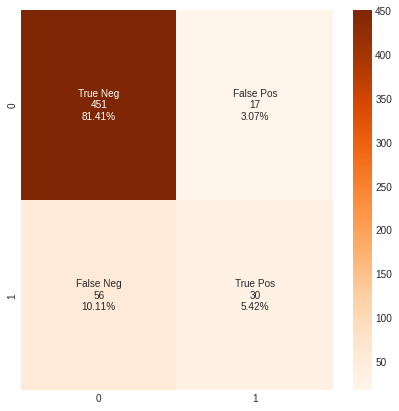

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_log)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Oranges')

In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       468
         1.0       0.49      0.23      0.31        86

    accuracy                           0.84       554
   macro avg       0.68      0.59      0.61       554
weighted avg       0.81      0.84      0.82       554



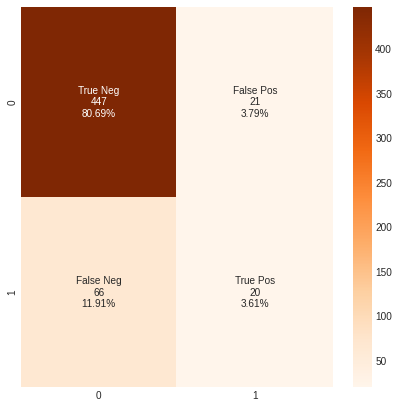

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_knn)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Oranges')

In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       468
         1.0       0.78      0.34      0.47        86

    accuracy                           0.88       554
   macro avg       0.84      0.66      0.70       554
weighted avg       0.87      0.88      0.86       554



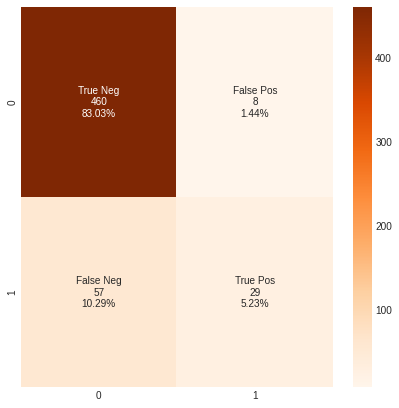

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_rf)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Oranges')

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       468
         1.0       0.66      0.36      0.47        86

    accuracy                           0.87       554
   macro avg       0.78      0.66      0.70       554
weighted avg       0.86      0.87      0.86       554



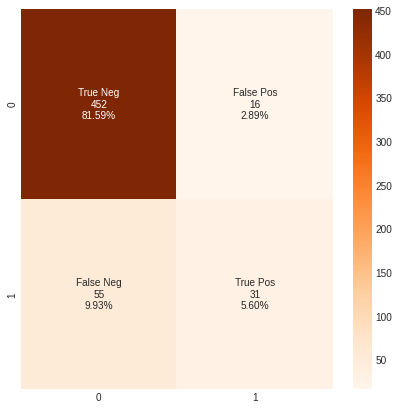

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_xgb)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Oranges')

In [ ]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y_actual,  y_proba); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:

auc_log, fpr_log, tpr_log = get_auc_scores(y, 
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])
auc_xgb, fpr_xgb, tpr_xgb = get_auc_scores(y, 
                                        xgb.predict(X),
                                        xgb.predict_proba(X)[:,1])

In [ ]:

auc_log, fpr_log, tpr_log = get_auc_scores(y, 
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])
auc_xgb, fpr_xgb, tpr_xgb = get_auc_scores(y, 
                                        xgb.predict(X),
                                        xgb.predict_proba(X)[:,1])

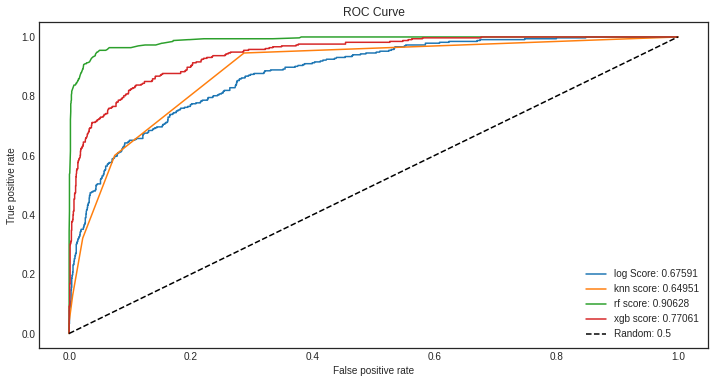

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log, tpr_log, label = 'log Score: ' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf score: ' + str(round(auc_rf, 5)))
plt.plot(fpr_xgb, tpr_xgb, label = 'xgb score: ' + str(round(auc_xgb, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42, k_neighbors=2)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0.0    1415
1.0     247
Name: Response, dtype: int64

In [ ]:
y_smote.value_counts()

0.0    1415
1.0    1415
Name: Response, dtype: int64

In [ ]:
# Fit Random Forest Classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
# Fit Logistic Regression 
lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)

LogisticRegression()

In [ ]:
# Fit KNN 
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_smote, y_smote)

KNeighborsClassifier()

In [ ]:
# Fit XGBoost 
xgb_smote = XGBClassifier()
xgb_smote.fit(X_smote, y_smote)

XGBClassifier()

In [ ]:
y_pred_smote_rf = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       468
         1.0       0.61      0.55      0.58        86

    accuracy                           0.88       554
   macro avg       0.76      0.74      0.75       554
weighted avg       0.87      0.88      0.87       554



In [ ]:
y_pred_smote_lr = lr_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote_lr))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85       468
         1.0       0.37      0.73      0.49        86

    accuracy                           0.77       554
   macro avg       0.66      0.75      0.67       554
weighted avg       0.85      0.77      0.79       554



In [ ]:
y_pred_smote_knn = knn_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       468
         1.0       0.33      0.71      0.45        86

    accuracy                           0.73       554
   macro avg       0.63      0.72      0.64       554
weighted avg       0.84      0.73      0.77       554



In [ ]:
y_pred_smote_xgb = xgb_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote_xgb))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       468
         1.0       0.53      0.59      0.56        86

    accuracy                           0.85       554
   macro avg       0.72      0.75      0.73       554
weighted avg       0.86      0.85      0.86       554



## Feature Importance

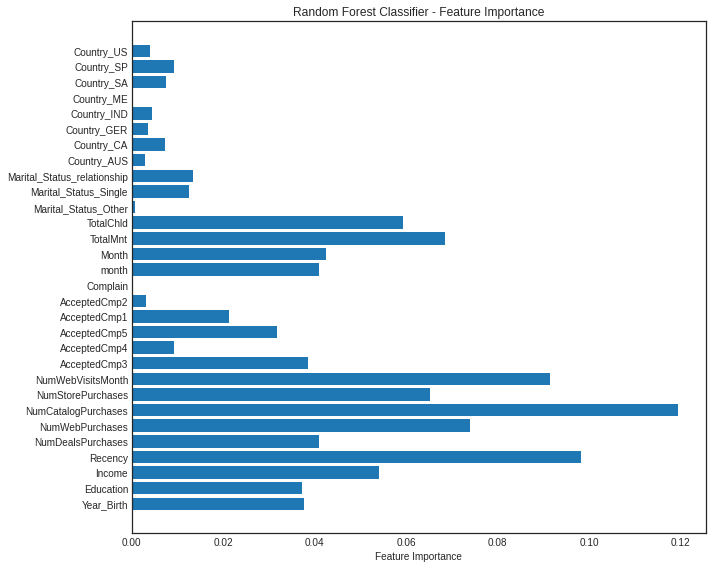

In [ ]:
fi = rf_smote.feature_importances_
col = X_train.columns

plt.figure(figsize=(10, 8))
plt.barh(col, fi)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan hasil prediksi model ke dalam DataFrame
y_pred_rf = pd.DataFrame(y_pred_smote_rf)

In [ ]:
y_pred_rf.value_counts()

0.0    477
1.0     77
dtype: int64

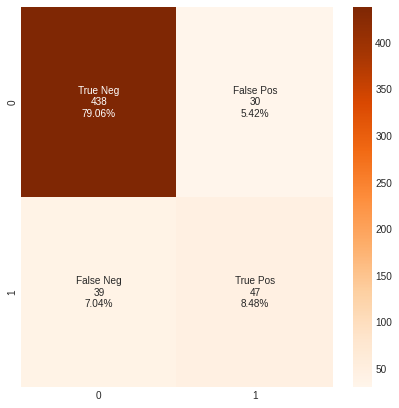

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_smote_rf)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Oranges')

Key Takeaway:

Hasil prediksi dengan Random Forest menunjukkan 49 customer dari 81 customer yang akan menerima campaign selanjutnya.